In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [4]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [5]:
data = data[data[3]==9.0]
data.head()

,0,1,2,3,4,5,6,7
288229,2004-02-28,01:05:16.177908,15,9.0,19.0672,40.6355,104.88,2.77533
288230,2004-02-28,01:05:46.740147,16,9.0,19.0672,40.8043,104.88,2.76242
288231,2004-02-28,01:07:15.995333,19,9.0,19.0084,40.9392,104.88,2.77533
288232,2004-02-28,01:07:46.555114,20,9.0,19.0084,41.2088,104.88,2.77533
288233,2004-02-28,01:08:16.270611,21,9.0,19.0084,41.1751,104.88,2.74963


In [9]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no S1
passo3= data.copy()
print(passo3.head())
print(passo3.shape)

(49890, 8) 10022
                 0                1   2    3        4        5       6  \
288229  2004-02-28  01:05:16.177908  15  9.0  19.0672  40.6355  104.88   
288230  2004-02-28  01:05:46.740147  16  9.0  19.0672  40.8043  104.88   
288231  2004-02-28  01:07:15.995333  19  9.0  19.0084  40.9392  104.88   
288232  2004-02-28  01:07:46.555114  20  9.0  19.0084  41.2088  104.88   
288233  2004-02-28  01:08:16.270611  21  9.0  19.0084  41.1751  104.88   

              7  
288229  2.77533  
288230  2.76242  
288231  2.77533  
288232  2.77533  
288233  2.74963  
(49890, 8)


In [10]:
passo3= passo3.drop(outliersIListaS1)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape

(39868, 8)


(39868, 9)

In [11]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data.head(1)

,0,1,2,3,4,5,6,7
0,2004-02-28,01:05:16.177908,15,9.0,19.0672,40.6355,104.88,2.77533


In [12]:
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

9.0 
             0                1   2    3        4        5       6        7
0  2004-02-28  01:05:16.177908  15  9.0  19.0672  40.6355  104.88  2.77533
1  2004-02-28  01:05:46.740147  16  9.0  19.0672  40.8043  104.88  2.76242
2  2004-02-28  01:07:15.995333  19  9.0  19.0084  40.9392  104.88  2.77533
3  2004-02-28  01:07:46.555114  20  9.0  19.0084  41.2088  104.88  2.77533
4  2004-02-28  01:08:16.270611  21  9.0  19.0084  41.1751  104.88  2.74963
--------------------------------


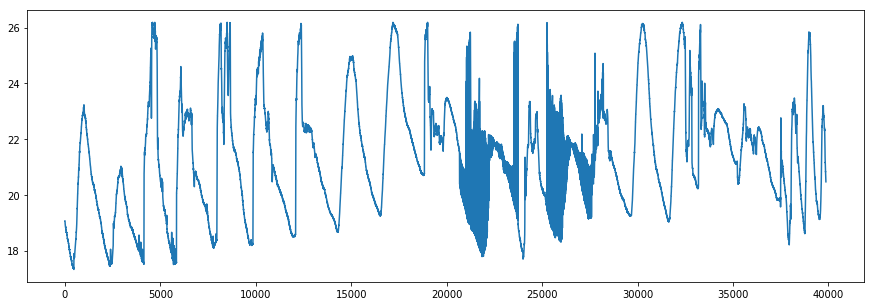

In [13]:
plt.figure(figsize = (15,5))
data[:data.shape[0]]['4'].plot()

In [14]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

In [15]:
data.shape, d.shape

((39868, 8), (39868, 8))

In [16]:
d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((39868, 8),
                 0                1      2    3        4        5     6  \
 28186  2004-03-25  05:42:04.118504  38972  9.0  24.5454  51.1548  0.46   
 28193  2004-03-25  05:46:04.579788  38980  9.0  24.7120  51.2827  0.92   
 28204  2004-03-25  05:51:43.477236  38991  9.0  24.3788  51.2188  2.76   
 38461  2004-04-01  12:08:20.625801  59904  9.0      NaN      NaN   NaN   
 38462  2004-04-01  12:09:18.277055  59906  9.0      NaN      NaN   NaN   
 
              7  
 28186  2.33827  
 28193  2.33827  
 28204  2.33827  
 38461  2.25825  
 38462  2.24970  )

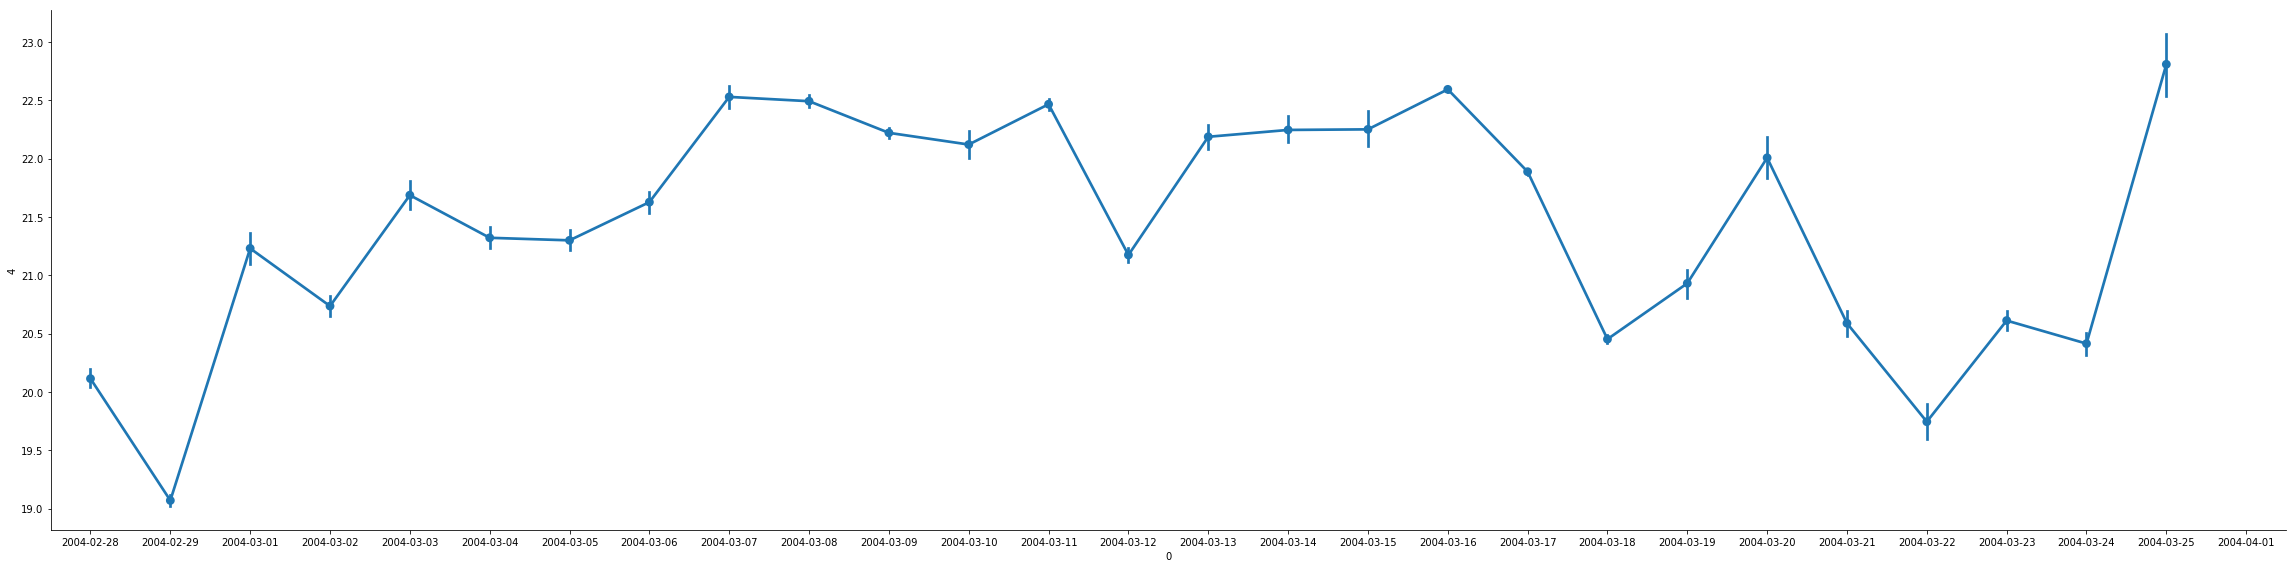

In [17]:
#plt.figure(figsize = (20,2))
sns.factorplot(x='0', y = '4', data = d, size = 8, aspect = 4)

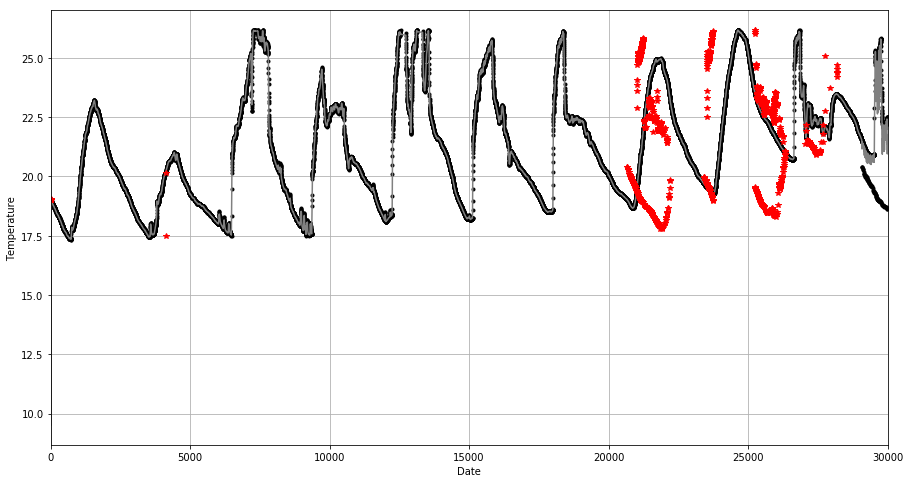

In [18]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
#style.use('fivethirtyeight')
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in izip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")
#events = explain_anomalies(y=Y, window_size=5, sigma=3)

# Display the anomaly dict
#print("Information about the anomalies model:{}".format(events))


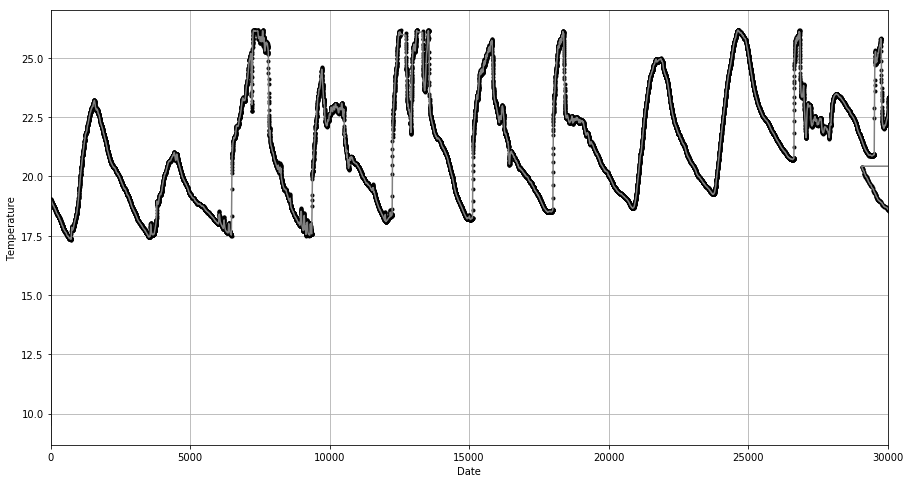

In [19]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [20]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

311


array([    0,     1,     2,     3,     4,   466,  3969,  3970,  4133,
        4134,  4135,  4136,  4137,  4138,  4139,  4140,  4141,  4522,
        4523,  4527,  4528,  4529,  4530,  4531,  4532,  4535,  4536,
        4538,  4539,  4540,  4715,  4716,  4717,  4827,  4828,  4834,
        4835,  4838,  4839,  4867,  5072,  5334,  5590,  5687,  5837,
        5838,  5839,  5840,  5841,  5842,  5843,  5844,  5845,  5846,
        6631,  6632,  6645,  6654,  6662,  6665,  6667,  6669,  6678,
        6706,  6708,  6715,  6741,  6783,  6819,  7427,  7955,  7956,
        7957,  7958,  7959,  7960,  7961,  7962,  7963,  7964,  7965,
        7966,  8303,  8657,  8658,  8659,  8661,  8662,  8663,  8665,
        8667,  8668,  8669,  9845,  9846,  9847,  9850,  9851,  9852,
        9853,  9854,  9855, 12082, 12083, 12084, 12086, 12087, 12088,
       12089, 12090, 12091, 12092, 12093, 12094, 18829, 18830, 18831,
       18833, 18834, 18835, 18836, 18837, 18838, 18841, 18842, 20972,
       20973, 20974,

In [21]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)

(39868, 8)
(39557, 8)


311


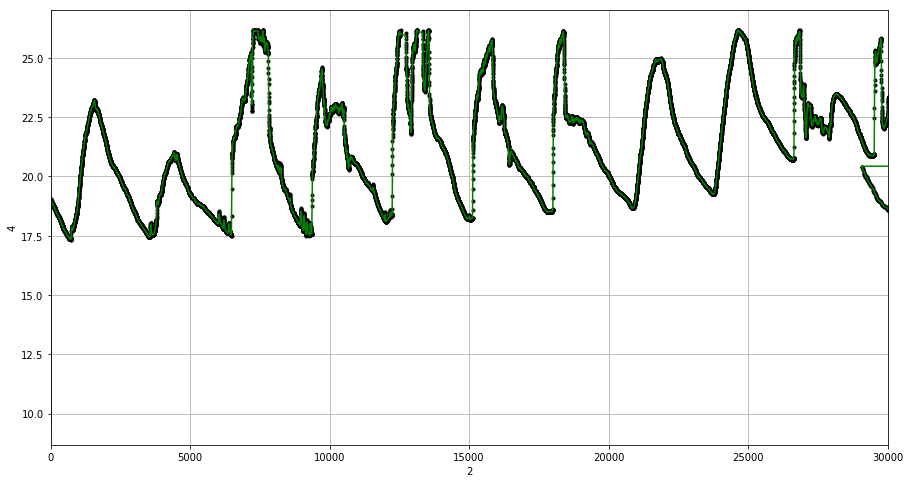

In [22]:
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")

# Depois de ter os dados reconstruídos - verificamos a sério temporal

4191


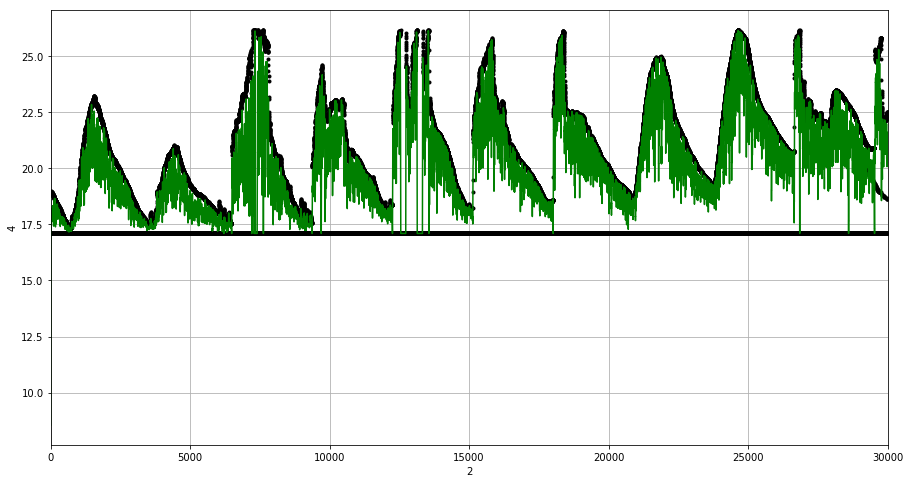

In [36]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")


# Estatísticas Simples

In [23]:
dplot[dplot['Moteid']==9].shape

(49890, 8)

In [24]:
# Passo 0
sensor = 9
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,49890,40.226775,38.959621,22.1052,30.231795


In [25]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),39868,21.484627,2.050303,21.4878,1.654633


In [26]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

39557


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,39557,21.481689,2.05075,21.478,1.65493


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [34]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.733827,2.671914,19.3514,2.35021


In [35]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )


  Data type   size       mean         SD   median        MAD
0  Raw Data  49890  40.226775  38.959621  22.1052  30.231795
      Data type   size       mean        SD   median       MAD
0  step 1 (BOR)  39868  21.484627  2.050303  21.4878  1.654633
     Data type   size       mean       SD  median      MAD
0  step 2 (AOR  39557  21.481689  2.05075  21.478  1.65493
  Data type   size       mean        SD   median      MAD
0    step 3  65536  19.733827  2.671914  19.3514  2.35021


##  Etapa para reconstruir as Épocas que estão faltando

In [27]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

39557

In [29]:
idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))
# print('min max ',np.min(idInputEq), np.max(idInputNEq) )    

26162
65536 39374


In [30]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((39868, 8), int,              1
 2004-02-28  67)

In [31]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
dfOut.tail(10)


26162


,0,1,2,3,4,5,6,7
26152,2004-03-12,05:03:02.38949,65523,1.0,0,41.3098,0.46,2.51661
26153,2004-03-12,05:03:44.620925,65524,1.0,0,41.3435,0.46,2.51661
26154,2004-03-12,05:04:06.979553,65525,1.0,0,41.3435,0.46,2.51661
26155,2004-03-12,05:04:34.780506,65526,1.0,0,41.2425,0.46,2.52732
26156,2004-03-12,05:05:00.973033,65527,1.0,0,41.2425,0.46,2.51661
26157,2004-03-12,05:05:28.684302,65528,1.0,0,41.0404,0.46,2.50599
26158,2004-03-12,05:05:58.706604,65530,1.0,0,41.3098,0.46,2.51661
26159,2004-03-12,05:07:01.831402,65532,1.0,0,41.2425,0.46,2.51661
26160,2004-03-12,05:07:33.708502,65533,1.0,0,41.3435,0.46,2.51661
26161,2004-03-12,05:09:08.839875,65534,1.0,0,41.2425,0.46,2.51661


# Gerando o csv para fazer reconstrução dos dados

In [32]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65719, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [33]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65719, 8))